### Blending and Pasting Images
Blending image is done through addWeighted function that uses both images and combines them,
To blend images, we use a simple formula: 
- new_pixel = alpha X pixel_1 + beta X pixel_2 + gamma

In [2]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
img1 = cv2.imread('Photos/1.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('Photos/water_coins.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

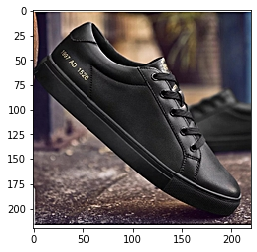

In [4]:
plt.imshow(img1)

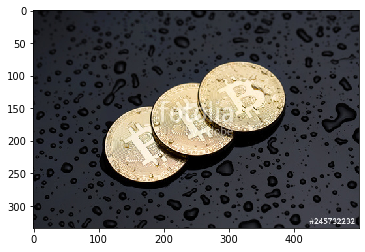

In [5]:
plt.imshow(img2)

##### Let's begin by resizing them to be same size

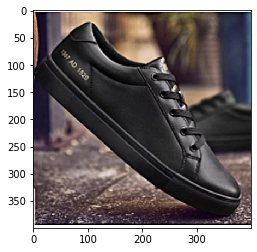

In [6]:
img1 = cv2.resize(img1, (400,400))
plt.imshow(img1)

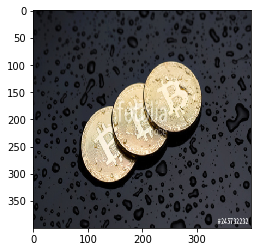

In [7]:
img2 = cv2.resize(img2, (400,400))
plt.imshow(img2)

Now that both images are same size, we can then blend them together usung the addWeighted() function.

addWeighted function only works if the images are same size

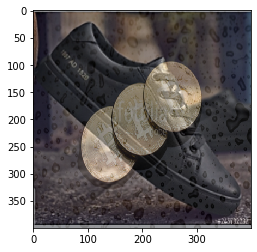

In [9]:
blended = cv2.addWeighted(src1=img1, alpha=0.5, src2=img2, beta=0.5, gamma=0)
plt.imshow(blended)

We can increase and decrease the alpha, beta values as you want

### Overlaying images of different sizes using Numpy reassignment

In [11]:
img1 = cv2.imread('Photos/1.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('Photos/water_coins.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

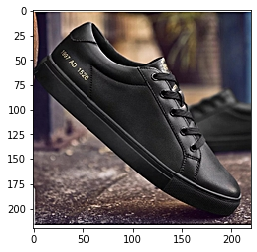

In [12]:
plt.imshow(img1)

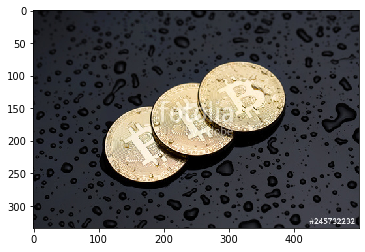

In [13]:
plt.imshow(img2)

In [14]:
#renaming the variables
small_img = img1
large_img = img2

# Using Numpy slicing
x_offset = 0
y_offset = 0

x_end = x_offset + small_img.shape[1]
y_end = y_offset + small_img.shape[0]

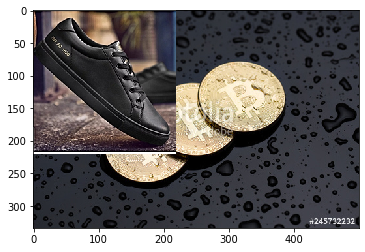

In [15]:
large_img[y_offset:y_end, x_offset:x_end] = small_img
plt.imshow(large_img)

### Blending together images of different sizes

In [16]:
#Reloading the original images

img1 = cv2.imread('Photos/1.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('Photos/water_coins.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [17]:
#Decide where in the actual image we want to blend the smaller interest. This is the region of interest
img1.shape

(220, 220, 3)

In [18]:
img2.shape

(334, 500, 3)

In [19]:
x_offset = 500 - 220 #we are subtracting x axis of the smaller image from the bigger on
y_offset = 334 - 220

In [20]:
rows, cols, channels = img2.shape

In [21]:
rows

334

In [22]:
cols

500

In [23]:
roi = img1[y_offset:100, x_offset:120]

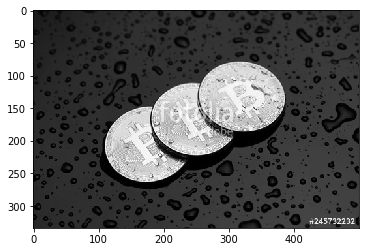

In [24]:
img2gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
plt.imshow(img2gray, cmap='gray')


In [25]:
mask_inv = cv2.bitwise_not(img2gray)

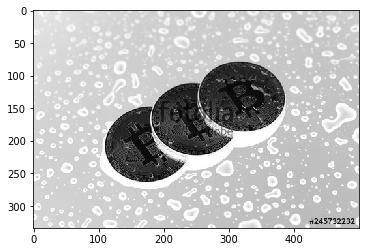

In [26]:
plt.imshow(mask_inv, cmap='gray')

In [27]:
mask_inv.shape

(334, 500)

Notice that mask_inv.shape is no longer a 3-channel. Let's fix it using numpy

In [28]:
import numpy as np

In [30]:
white_background = np.full(img2.shape, 255, dtype=np.uint8)

In [31]:
white_background.shape

(334, 500, 3)

In [32]:
bk = cv2.bitwise_or(white_background, white_background, mask=mask_inv)
bk.shape

(334, 500, 3)

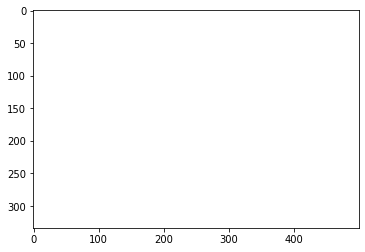

In [33]:
plt.imshow(bk)

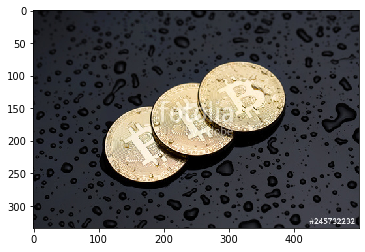

In [34]:
fg = cv2.bitwise_or(img2, img2, mask=mask_inv)
plt.imshow(fg)